# Differential equations tools and demonstrations
By <a href="https://www.maxkapur.com/">Max Kapur</a>. Updated Nov. 9, 2019.

For now, this page contains only a demonstration of Euler&rsquo;s method. Once I get a chance to clean up my notes, I intend to add a demonstration of using matplotlib&rsquo;s <code>quiver</code> tool to plot particular solutions to matrix-form DEs against their phase planes.

In [91]:
import numpy as np
from matplotlib.pyplot import plot, legend, title, figure, xlabel, ylabel

## Euler&rsquo;s method

Refererence: Paul&rsquo;s Online Notes, <a href="http://tutorial.math.lamar.edu/Classes/DE/EulersMethod.aspx">section 2.9</a>

Euler&rsquo;s method is a conceptually simple way of estimating the value of a first-order differential equation. It is especially accurate for $t$-values close to the initial condition. It works by putting the DE in terms of $y'$ and then taking discrete steps of size $h$ in the direction of the tangent line at time $t+hn$. 

I use Euler&rsquo;s method to create graphs of two of Paul&rsquo;s example functions. 

#### Example 1: $\qquad y′ + 2y = 2− e^{−4t} \qquad y(0)=1$

The solution, unknown to us, is $y(t)=1+\frac{1}{2}e^{−4t}−\frac{1}{2}e^{−2t}$.

In [92]:
# Put the equation in terms of y'
def ex1(t,y):
    return 2 - np.exp(-4 * t) - 2*y

# Shhh
def ex1_solution(t):
    return 1 + np.exp(-4*t)/2 - np.exp(-2*t)/2

In [93]:
# Prepare an array with the first y'(t,y) calculation
ex1out = np.empty((0,3), float)
ex1out = np.append(ex1out, np.array([[0,1,ex1(0,1)]]), axis=0)
h = 0.1
n = 10

In [94]:
for i in range(1,n+1):
    new = np.array([[ex1out[i - 1,0] + h, ex1out[i - 1,1] + h * ex1out[i - 1,2],0]])
    ex1out= np.append(ex1out,new,axis=0)
    ex1out[i,2]= ex1(ex1out[i,0],ex1out[i,1])

Let&rsquo;s make a similar similar to Paul&rsquo;s. The first column indicates the $t$-value, the second indicates the estimate for $y(t)$, and the third indicates the evaluation of the DE at the given $t$ and $y$&mdash;that is, the slope of our next step. 

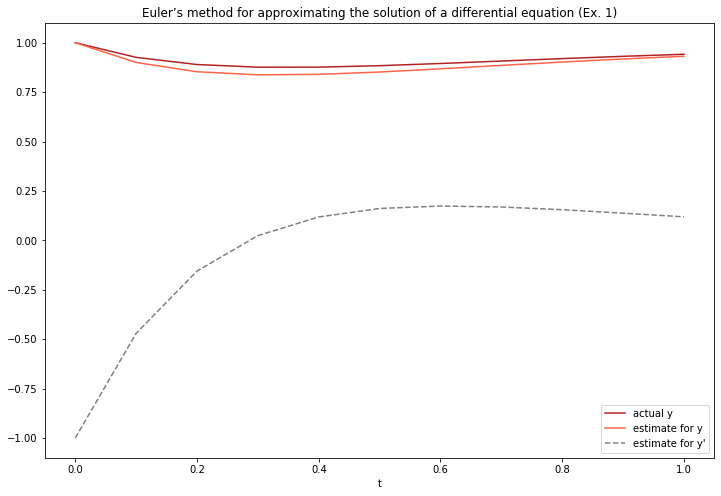

In [95]:
figure(figsize=(12,8))
xlabel('t')
title('Euler’s method for approximating the solution of a differential equation (Ex. 1)')

plot(ex1out[:,0],ex1_solution(ex1out[:,0]),label='actual y', color='firebrick')
plot(ex1out[:,0],ex1out[:,1],label='estimate for y', color='tomato')
plot(ex1out[:,0],ex1out[:,2],label='estimate for y\'', color='black',ls='--',alpha=.5)
legend()

#### Example 3: $\qquad y' - y =  - \frac{1}{2}{e}^{\frac{t}{2}}\sin(5t) + 5e^{\frac{t}{2}}\cos(5t)\qquad y( 0 ) = 0$

The solution, unknown to us, is $y(t)= e^{t/2}\sin(5t)$.

In [96]:
def ex3(t,y):
    return y + (-0.5 * np.exp(t/2) * np.sin(5*t)) + (5*np.exp(t/2)*np.cos(5*t))

def ex3_solution(t):
    return np.exp(t/2)*np.sin(5*t)

In [97]:
ex3out = np.empty((0,3), float)
ex3out = np.append(ex3out, np.array([[0,0,ex3(0,0)]]), axis=0)
h = 0.01
n = 500

In [98]:
for i in range(1,n+1):
    new = np.array([[ex3out[i - 1,0] + h, ex3out[i - 1,1] + h * ex3out[i - 1,2],0]])
    ex3out = np.append(ex3out,new,axis=0)
    ex3out[i,2] = ex3(ex3out[i,0],ex3out[i,1])

In [99]:
ex3out[:10]

array([[0.        , 0.        , 5.        ],
       [0.01      , 0.05      , 5.04366774],
       [0.02      , 0.10043668, 5.07503891],
       [0.03      , 0.15118707, 5.09391096],
       [0.04      , 0.20212618, 5.100111  ],
       [0.05      , 0.25312729, 5.09349656],
       [0.06      , 0.30406225, 5.07395627],
       [0.07      , 0.35480181, 5.04141043],
       [0.08      , 0.40521592, 4.99581155],
       [0.09      , 0.45517403, 4.93714478]])

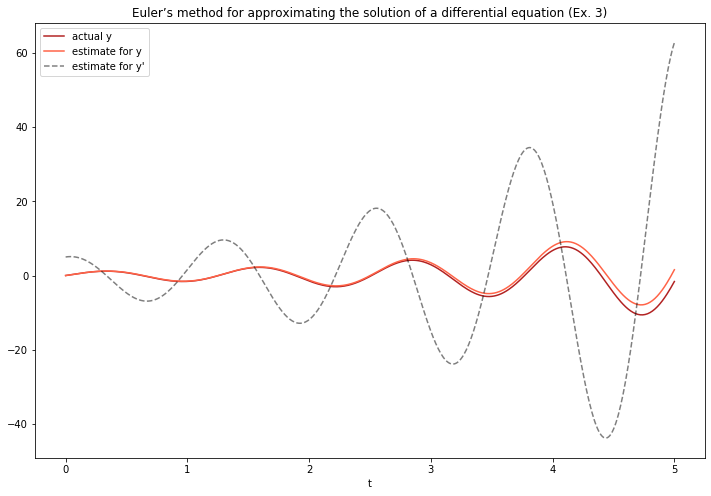

In [100]:
figure(figsize=(12,8))
xlabel('t')
title('Euler’s method for approximating the solution of a differential equation (Ex. 3)')

plot(ex3out[:,0],ex3_solution(ex3out[:,0]),label='actual y', color='firebrick')
plot(ex3out[:,0],ex3out[:,1],label='estimate for y', color='tomato')
plot(ex3out[:,0],ex3out[:,2],label='estimate for y\'', color='black',ls='--',alpha=.5)
legend()

## Direction fields and quiver plots

Reference: Paul&rsquo;s Online Notes, <a href="http://tutorial.math.lamar.edu/Classes/DE/DirectionFields.aspx">section 1.2</a>, <a href="http://tutorial.math.lamar.edu/Classes/DE/PhasePlane.aspx">section 5.6</a>

Under construction. (Note to self: See notes from May 28, 2019.)

In [102]:
!jupyter nbconvert diffeq.ipynb

[NbConvertApp] Converting notebook diffeq.ipynb to html
[NbConvertApp] Writing 386405 bytes to diffeq.html
